In [1]:
import pandas as pd

In [3]:
csv_file_path = 'filtering_result.csv'
data = pd.read_csv(csv_file_path)

In [4]:
print(data.head())

  Publication Type                                            Authors  \
0                J                           Geum, Y; Lee, S; Park, Y   
1                C                                            Guo, WD   
2                J                          Cho, Y; Yoon, SP; Kim, KS   
3                J  Ghazinoory, S; Dastranj, N; Saghafi, F; Kulshr...   
4                C             Letaba, P; Pretorius, MW; Pretorius, L   

  Book Authors                                       Book Editors  \
0          NaN                                                NaN   
1          NaN                                                NaN   
2          NaN                                                NaN   
3          NaN                                                NaN   
4          NaN  Kocaoglu, DF; Anderson, TR; Daim, TU; Kozanogl...   

         Book Group Authors  \
0                       NaN   
1  Northeastern Univ, China   
2                       NaN   
3                     

In [6]:
abstract_column = data['Abstract']

In [7]:
print(abstract_column)

0      Due to the volatile market environment, the us...
1      For high technology companies, the successful ...
2      Technology roadmap is one of the useful tools ...
3      Technology roadmapping is a planning tool that...
4      The technology roadmapping field has evolved o...
                             ...                        
228    Valuing invention disclosures in universities ...
229    The focus of this paper is on power transmissi...
230    Purpose - The purpose of this paper is a Q& A ...
231    Purpose - Describes how Jaguar Cars is evaluat...
232    This paper describes how modularity is impleme...
Name: Abstract, Length: 233, dtype: object


In [8]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

In [11]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
def tokenize_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

In [14]:
def tokenize_words(sentence):
    words = word_tokenize(sentence)
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return words

In [15]:
preprocessed_data = []

In [16]:
for abstract in abstract_column:
    sentences = tokenize_sentences(abstract)
    preprocessed_sentences = [tokenize_words(sentence) for sentence in sentences]
    preprocessed_data.append(preprocessed_sentences)


In [17]:
preprocessed_data

[[['Due',
   'volatile',
   'market',
   'environment',
   ',',
   'use',
   'scenario',
   'approach',
   'come',
   'forefront',
   'business',
   'strategy',
   '.'],
  ['mean',
   'scenario',
   'planning',
   ',',
   'several',
   'approach',
   'proposed',
   'conducted',
   '.'],
  ['However',
   ',',
   'previous',
   'research',
   ',',
   'mainly',
   'resorted',
   'expert',
   'judgment',
   'planning',
   'evaluation',
   ',',
   'still',
   'remains',
   'conceptual',
   'lack',
   'systematic',
   'link',
   'planning',
   'process',
   '.'],
  ['response',
   ',',
   'paper',
   'provides',
   'integrative',
   'approach',
   'technology',
   'roadmap',
   'system',
   'dynamic',
   'support',
   'scenario',
   'planning',
   '.'],
  ['proposed',
   'approach',
   'consists',
   'three',
   'part',
   ':',
   'scenario',
   'building',
   ',',
   'technology',
   'roadmapping',
   ',',
   'system',
   'dynamic',
   'simulation',
   '.'],
  ['first',
   'step',
   'const

In [23]:
data['preprocessed_abstract'] = preprocessed_data

In [22]:
three_letter_words = []

for abstract_sentences  in preprocessed_data:
    for sentence_words in abstract_sentences :
        for word in sentence_words:
            if len(word) == 3:
                three_letter_words.append(word)

In [20]:
three_letter_words

['Due',
 'use',
 'end',
 'key',
 'new',
 'six',
 'TRM',
 'one',
 'use',
 'key',
 'TCs',
 'new',
 'way',
 'map',
 'gap',
 'one',
 'Due',
 'big',
 'yet',
 'ARM',
 'two',
 'two',
 'ARM',
 'two',
 'map',
 'map',
 'map',
 'map',
 'map',
 'aim',
 'aim',
 'Big',
 'BFR',
 'key',
 'BFR',
 'key',
 'BFR',
 'use',
 'use',
 'new',
 'new',
 'put',
 'new',
 'six',
 'ITR',
 'ITR',
 'ITR',
 'e.g',
 'new',
 'etc',
 'six',
 'ITR',
 'six',
 'Niu',
 'IDF',
 'one',
 'aim',
 'Two',
 'use',
 'lot',
 'one',
 'new',
 'new',
 'use',
 'use',
 'B.V',
 'far',
 'via',
 'led',
 'far',
 'key',
 'via',
 'Ltd',
 'new',
 'new',
 'new',
 'lot',
 '100',
 'new',
 'new',
 'use',
 'gap',
 'use',
 'use',
 'aim',
 'way',
 'TRM',
 '212',
 'add',
 'due',
 'big',
 'aim',
 '400',
 'ass',
 'one',
 'pay',
 'via',
 'low',
 'use',
 'use',
 'pay',
 'use',
 'law',
 'new',
 'aim',
 'New',
 'use',
 'TRM',
 '1.0',
 'TRM',
 'way',
 'new',
 'TRM',
 '2.0',
 'TRM',
 'TRM',
 '1.0',
 'TRM',
 'via',
 'TRM',
 'TRM',
 'TRM',
 'TRM',
 'TRM',
 'one',


In [26]:
# 길이가 1글자 또는 2글자, 소문자로 된 3글자인 단어 삭제
for idx, abstract_sentences in enumerate(data['preprocessed_abstract']):
    for sentence_idx, sentence_words in enumerate(abstract_sentences):
        filtered_words = []
        for word in sentence_words:
            if len(word) > 2 and (len(word) != 3 or word.islower()):
                filtered_words.append(word)
        data['preprocessed_abstract'][idx][sentence_idx] = filtered_words

# 결과 확인
print(data['preprocessed_abstract'])

0      [[volatile, market, environment, use, scenario...
1      [[high, technology, company, successful, acqui...
2      [[Technology, roadmap, one, useful, tool, mana...
3      [[Technology, roadmapping, planning, tool, pla...
4      [[technology, roadmapping, field, evolved, tim...
                             ...                        
228    [[Valuing, invention, disclosure, university, ...
229    [[focus, paper, power, transmission, gridlock,...
230    [[Purpose, purpose, paper, interview, conducte...
231    [[Purpose, Describes, Jaguar, Cars, evaluating...
232    [[paper, describes, modularity, implemented, r...
Name: preprocessed_abstract, Length: 233, dtype: object


In [27]:
for idx, abstract_sentences in enumerate(data['preprocessed_abstract']):
    for sentence_idx, sentence_words in enumerate(abstract_sentences):
        unique_words = list(set(sentence_words))
        data['preprocessed_abstract'][idx][sentence_idx] = unique_words

# 결과 확인
print(data['preprocessed_abstract'])

0      [[scenario, approach, use, come, forefront, vo...
1      [[successful, enable, factor, management, tech...
2      [[planning, tool, managing, Technology, well, ...
3      [[tool, technology, planning, industry, Techno...
4      [[technology, second, roadmaps, current, evolv...
                             ...                        
228    [[well, research, beyond, make, profit, invent...
229    [[year, problem, methodology, one, literature,...
230    [[Joanne, impart, prominent, robotic, technolo...
231    [[process, Cars, technology, evaluating, futur...
232    [[stand-alone, technology, together, module, a...
Name: preprocessed_abstract, Length: 233, dtype: object


In [28]:
data.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,preprocessed_abstract
0,J,"Geum, Y; Lee, S; Park, Y",NaN,NaN,NaN,"Geum, Youngjung; Lee, Sora; Park, Yongtae",NaN,NaN,Combining technology roadmap and system dynami...,COMPUTERS & INDUSTRIAL ENGINEERING,...,Computer Science; Engineering,AG0KF,NaN,NaN,NaN,NaN,2023-08-29,WOS:000335103700005,View Full Record in Web of Science,"[[scenario, approach, use, come, forefront, vo..."
1,C,"Guo, WD",NaN,NaN,"Northeastern Univ, China","Guo, Weidong",NaN,NaN,Technology Roadmapping as a New Tool of Knowle...,"2010 CHINESE CONTROL AND DECISION CONFERENCE, ...",...,Automation & Control Systems; Engineering; Ope...,BUV61,NaN,NaN,NaN,NaN,2023-08-29,WOS:000290460300335,View Full Record in Web of Science,"[[successful, enable, factor, management, tech..."
2,J,"Cho, Y; Yoon, SP; Kim, KS",NaN,NaN,NaN,"Cho, Yonghee; Yoon, Seong-Pil; Kim, Karp -Soo",NaN,NaN,An industrial technology roadmap for supportin...,TECHNOLOGICAL FORECASTING AND SOCIAL CHANGE,...,Business & Economics; Public Administration,DN1CS,NaN,NaN,NaN,NaN,2023-08-29,WOS:000376804500001,View Full Record in Web of Science,"[[planning, tool, managing, Technology, well, ..."
3,J,"Ghazinoory, S; Dastranj, N; Saghafi, F; Kulshr...",NaN,NaN,NaN,"Ghazinoory, Sepehr; Dastranj, Nasrin; Saghafi,...",NaN,NaN,Technology roadmapping architecture based on t...,TECHNOLOGICAL FORECASTING AND SOCIAL CHANGE,...,Business & Economics; Public Administration,FC9TP,NaN,NaN,NaN,NaN,2023-08-29,WOS:000407184300021,View Full Record in Web of Science,"[[tool, technology, planning, industry, Techno..."
4,C,"Letaba, P; Pretorius, MW; Pretorius, L",NaN,"Kocaoglu, DF; Anderson, TR; Daim, TU; Kozanogl...",NaN,"Letaba, Petrus; Pretorius, Marthinus W.; Preto...",NaN,NaN,Analysis of the Intellectual Structure and Evo...,PICMET '15 PORTLAND INTERNATIONAL CENTER FOR M...,...,Engineering; Operations Research & Management ...,BF4AJ,NaN,NaN,NaN,NaN,2023-08-29,WOS:000380611600222,View Full Record in Web of Science,"[[technology, second, roadmaps, current, evolv..."


In [29]:
# 'Publication Year' 열의 데이터 값 빈도 확인
publication_year_counts = data['Publication Year'].value_counts()

# 결과 확인
print(publication_year_counts)

2016    19
2015    17
2021    16
2011    15
2009    14
2018    14
2007    14
2010    13
2022    13
2013    13
2012    12
2019    11
2008    10
2020     9
2003     7
2017     7
2004     6
2005     5
1997     4
2023     4
2006     3
2002     2
2001     2
2000     1
2014     1
1998     1
Name: Publication Year, dtype: int64


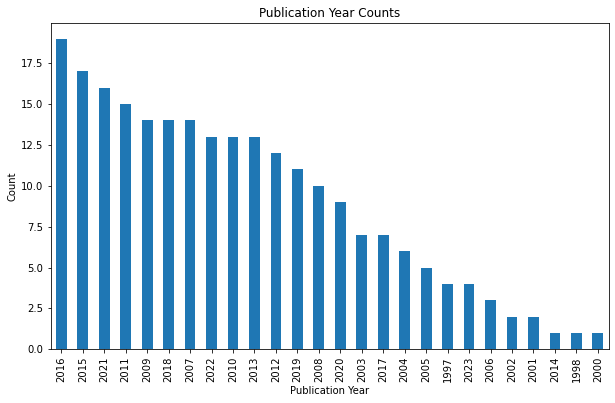

In [32]:
import matplotlib.pyplot as plt

# 'Publication Year' 열의 데이터 값 기준으로 빈도 계산 및 정렬
publication_year_counts = data.groupby('Publication Year').size().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
publication_year_counts.plot(kind='bar')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('Publication Year Counts')
plt.show()

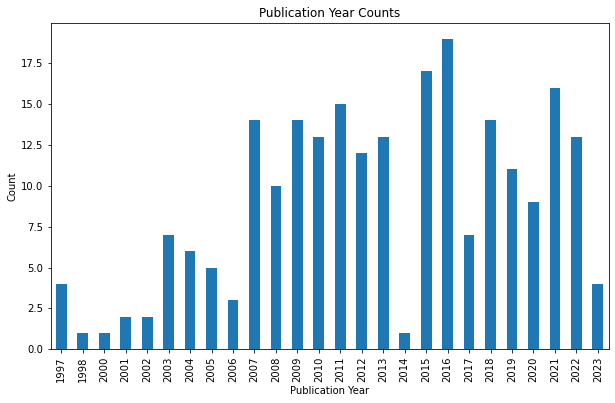

In [34]:
# 'Publication Year' 열의 데이터 값 기준으로 빈도 계산 및 정렬
publication_year_counts = data.groupby('Publication Year').size().sort_index(ascending=True)  # x 값 기준으로 정렬

# 시각화
plt.figure(figsize=(10, 6))
publication_year_counts.plot(kind='bar')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('Publication Year Counts')
plt.show()

In [35]:
bins = [1996, 2006, 2011, 2016, 2023]  # 원하는 구간의 시작과 끝 년도

# 'Publication Year' 값을 기준으로 데이터를 구간별로 분류
data['Year Range'] = pd.cut(data['Publication Year'], bins=bins, labels=[f"{start + 1}-{end}" for start, end in zip(bins[:-1], bins[1:])])

# 각 구간별로 데이터를 추출하여 CSV 파일로 저장
for year_range, group in data.groupby('Year Range'):
    output_file_path = f'{year_range}_data.csv'  # 파일 이름 설정
    group.to_csv(output_file_path, index=False)
    print(f'{year_range} data saved to {output_file_path}')

1997-2006 data saved to 1997-2006_data.csv
2007-2011 data saved to 2007-2011_data.csv
2012-2016 data saved to 2012-2016_data.csv
2017-2023 data saved to 2017-2023_data.csv


In [36]:
from itertools import combinations
import networkx as nx

In [38]:
csv_file_path1 = '1997-2006_data.csv'
csv_file_path2 = '2007-2011_data.csv'
csv_file_path3 = '2012-2016_data.csv'
csv_file_path4 = '2017-2023_data.csv'

In [56]:
data1 = pd.read_csv(csv_file_path1)
data2 = pd.read_csv(csv_file_path2)
data3 = pd.read_csv(csv_file_path3)
data4 = pd.read_csv(csv_file_path4)

In [65]:
preprocessed_abstract_column1 = data1['preprocessed_abstract']
preprocessed_abstract_column2 = data2['preprocessed_abstract']
preprocessed_abstract_column3 = data3['preprocessed_abstract']
preprocessed_abstract_column4 = data4['preprocessed_abstract']

In [58]:
keyword_cooccurrences = {}

In [59]:
for abstract_sentences in preprocessed_abstract_column4:
    sentence_words = word_tokenize(abstract_sentences)  # 문장을 토큰화하여 단어 추출
    keyword_combinations = list(combinations(sentence_words, 2))  # 모든 가능한 키워드 조합 생성
    for keyword_pair in keyword_combinations:
        keyword_pair = tuple(sorted(keyword_pair))  # 정렬하여 중복 제거
        if keyword_pair in keyword_cooccurrences:
            keyword_cooccurrences[keyword_pair] += 1
        else:
            keyword_cooccurrences[keyword_pair] = 1

In [60]:
# 동시출현 행렬 생성
keyword_list = list(set(keyword for keyword_pair in keyword_cooccurrences.keys() for keyword in keyword_pair))
cooccurrence_matrix = pd.DataFrame(0, index=keyword_list, columns=keyword_list)

In [61]:
for (keyword1, keyword2), count in keyword_cooccurrences.items():
    cooccurrence_matrix.at[keyword1, keyword2] = count
    cooccurrence_matrix.at[keyword2, keyword1] = count

In [62]:
G = nx.Graph()

for keyword in keyword_list:
    G.add_node(keyword)

for (keyword1, keyword2), count in keyword_cooccurrences.items():
    G.add_edge(keyword1, keyword2, weight=count)

In [63]:
print(cooccurrence_matrix)

               'publication  'disruptive  'cover  'economically  'waiting  \
'publication              3            0       0              0         0   
'disruptive               0            1       0              0         0   
'cover                    0            0       0              0         0   
'economically             0            0       0              1         0   
'waiting                  0            0       0              0         0   
...                     ...          ...     ...            ...       ...   
'reveals                  0            0       0              0         0   
'lesson                   0            0       0              0         0   
'Federal                  0            0       0              0         0   
'shorter                  1            0       0              0         0   
'known                    0            0       0              0         0   

               'hardware  'gained  'creates  '2006-2010  'pathways  ...  \


In [64]:
print(G.number_of_nodes(), "노드")
print(G.number_of_edges(), "엣지")

2332 노드
240109 엣지


In [66]:
cooccurrence_matrix.to_csv('keyword_cooccurrence_matrix_4.csv')